In [17]:
# lenet5_mnist_visual_tqdm.py
# LeNet-5 训练 MNIST + tqdm 进度条 + 可视化

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm import tqdm 

# ==============================
# 1. 数据加载与预处理
# ==============================
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # LeNet输入32x32
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


In [18]:
# ==============================
# 2. 定义 LeNet-5 网络（已修正形状）
# ==============================
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 修正输入尺寸
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        x = self.pool1(x)
        x = torch.tanh(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 16 * 6 * 6)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x



In [19]:
# ==============================
# 3. 训练与测试函数
# ==============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, test_losses, test_accuracies = [], [], []

def train(epoch):
    model.train()
    running_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch [{epoch}] Training", leave=False)
    for data, target in loop:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        loop.set_postfix(loss=loss.item())  # 在进度条后动态显示当前loss
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"✅ Epoch {epoch} | Train Loss: {avg_loss:.4f}")

def test(epoch):
    model.eval()
    test_loss = 0
    correct = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        loop = tqdm(test_loader, desc=f"Epoch [{epoch}] Testing", leave=False)
        for data, target in loop:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_preds.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            loop.set_postfix(loss=loss.item())

    test_loss /= len(test_loader)
    acc = 100. * correct / len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracies.append(acc)
    print(f"📊 Epoch {epoch} | Test Loss: {test_loss:.4f}, Accuracy: {acc:.2f}%")
    return all_preds, all_targets




✅ Epoch 1 | Train Loss: 0.2391


📊 Epoch 1 | Test Loss: 0.1088, Accuracy: 96.70%


✅ Epoch 2 | Train Loss: 0.0690


📊 Epoch 2 | Test Loss: 0.0581, Accuracy: 98.21%


✅ Epoch 3 | Train Loss: 0.0499


📊 Epoch 3 | Test Loss: 0.0476, Accuracy: 98.49%


✅ Epoch 4 | Train Loss: 0.0381


📊 Epoch 4 | Test Loss: 0.0483, Accuracy: 98.50%


✅ Epoch 5 | Train Loss: 0.0305


📊 Epoch 5 | Test Loss: 0.0469, Accuracy: 98.40%


✅ Epoch 6 | Train Loss: 0.0266


📊 Epoch 6 | Test Loss: 0.0451, Accuracy: 98.53%


✅ Epoch 7 | Train Loss: 0.0228


📊 Epoch 7 | Test Loss: 0.0388, Accuracy: 98.77%


✅ Epoch 8 | Train Loss: 0.0215


📊 Epoch 8 | Test Loss: 0.0370, Accuracy: 98.84%


✅ Epoch 9 | Train Loss: 0.0157


📊 Epoch 9 | Test Loss: 0.0401, Accuracy: 98.87%


✅ Epoch 10 | Train Loss: 0.0159


📊 Epoch 10 | Test Loss: 0.0423, Accuracy: 98.74%


✅ Epoch 11 | Train Loss: 0.0142


📊 Epoch 11 | Test Loss: 0.0372, Accuracy: 98.92%


✅ Epoch 12 | Train Loss: 0.0121


📊 Epoch 12 | Test Loss: 0.0441, Accuracy: 98.77%


✅ Epoch 13 | Train Loss: 0.0108


📊 Epoch 13 | Test Loss: 0.0449, Accuracy: 98.72%


✅ Epoch 14 | Train Loss: 0.0145


📊 Epoch 14 | Test Loss: 0.0467, Accuracy: 98.58%


✅ Epoch 15 | Train Loss: 0.0112


📊 Epoch 15 | Test Loss: 0.0435, Accuracy: 98.79%


✅ Epoch 16 | Train Loss: 0.0097


📊 Epoch 16 | Test Loss: 0.0401, Accuracy: 98.86%


✅ Epoch 17 | Train Loss: 0.0072


📊 Epoch 17 | Test Loss: 0.0397, Accuracy: 98.94%


✅ Epoch 18 | Train Loss: 0.0102


📊 Epoch 18 | Test Loss: 0.0478, Accuracy: 98.61%


✅ Epoch 19 | Train Loss: 0.0103


📊 Epoch 19 | Test Loss: 0.0434, Accuracy: 98.87%


✅ Epoch 20 | Train Loss: 0.0051


📊 Epoch 20 | Test Loss: 0.0451, Accuracy: 98.82%


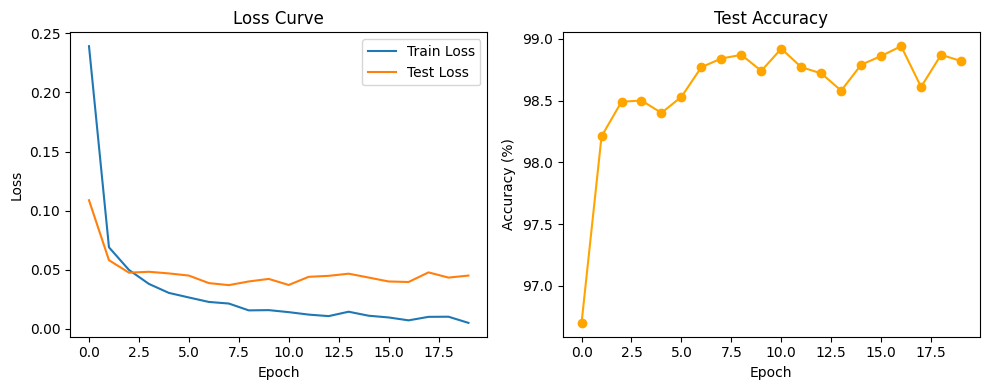

In [20]:
# ==============================
# 4. 主训练循环
# ==============================
epochs = 20
for epoch in range(1, epochs + 1):
    train(epoch)
    preds, targets = test(epoch)

# ==============================
# 5. 训练过程可视化
# ==============================
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, marker='o', color='orange')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()



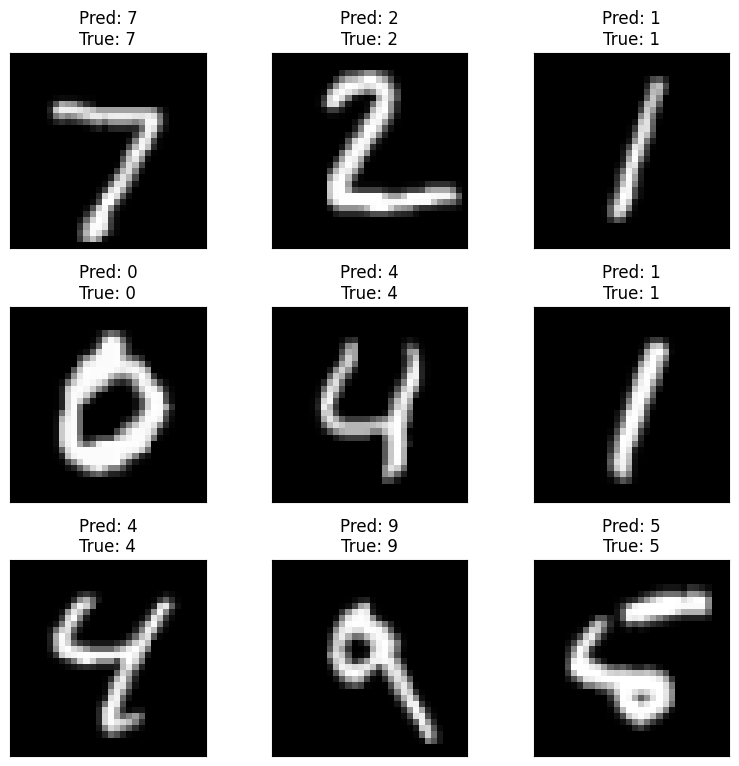

In [21]:
# ==============================
# 6. 随机预测结果可视化
# ==============================
model.eval()
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data.to(device))

pred = output.argmax(dim=1, keepdim=True).cpu()

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Pred: {pred[i].item()}\nTrue: {example_targets[i].item()}")
    plt.xticks([])
    plt.yticks([])
plt.show()

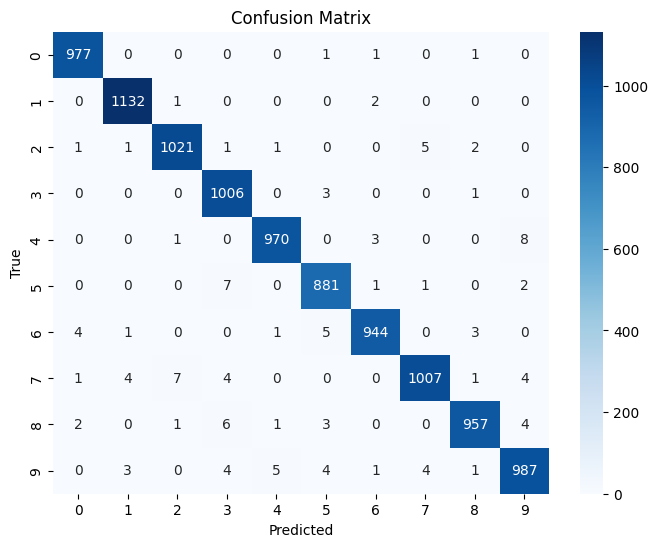

In [22]:
# ==============================
# 7. 混淆矩阵可视化
# ==============================
cm = confusion_matrix(targets, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

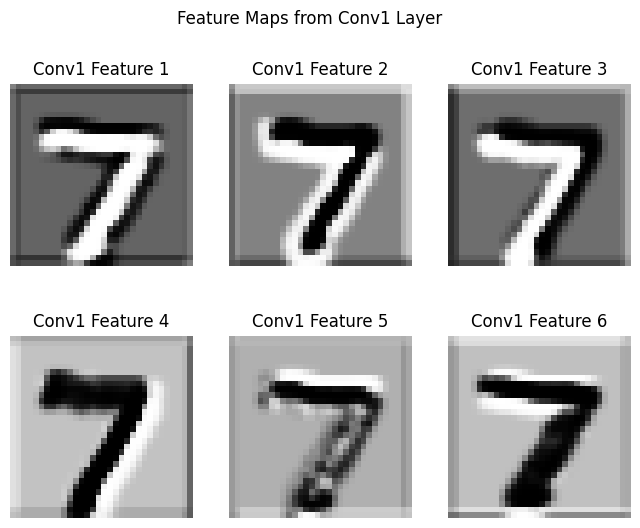

In [25]:
# ==============================
# 8. 卷积特征图可视化
# ==============================
def visualize_feature_maps():
    model.eval()
    with torch.no_grad():
        img = example_data[0].unsqueeze(0).to(device)
        feat1 = torch.tanh(model.conv1(img)).cpu()
    plt.figure(figsize=(8, 6))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(feat1[0, i].numpy(), cmap='gray')
        plt.title(f'Conv1 Feature {i+1}')
        plt.axis('off')
    plt.suptitle("Feature Maps from Conv1 Layer")
    plt.show()

visualize_feature_maps()